In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")


!pip install mediapipe
# Clean up the notebook
clean_notebook()



Notebook cleaned.


I0000 00:00:1733675661.021877 8890379 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733675661.036633 8890505 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733675661.042220 8890505 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733675661.063211 8890505 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


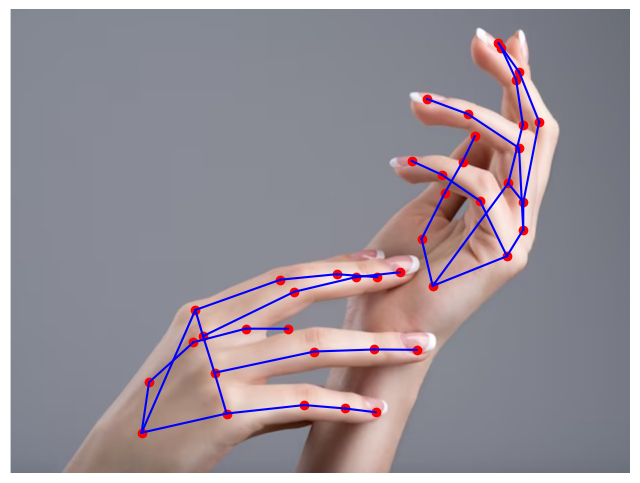

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Function to draw landmarks on Matplotlib
def draw_landmarks_on_matplotlib(image, landmarks, connections, ax):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if landmarks:
        for landmark in landmarks.landmark:
            ax.scatter(landmark.x * image.shape[1], landmark.y * image.shape[0], color='red')
        if connections:
            for connection in connections:
                start_idx, end_idx = connection
                ax.plot([landmarks.landmark[start_idx].x * image.shape[1], landmarks.landmark[end_idx].x * image.shape[1]],
                        [landmarks.landmark[start_idx].y * image.shape[0], landmarks.landmark[end_idx].y * image.shape[0]],
                        color='blue')


# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Load an image
image_path = '.././images/hand00.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and perform hand detection
results = hands.process(image_rgb)


# Plot the image and hand landmarks using Matplotlib
fig, ax = plt.subplots(figsize=(8, 8))

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        draw_landmarks_on_matplotlib(image, hand_landmarks, mp_hands.HAND_CONNECTIONS, ax)

ax.axis('off')
plt.show()

# Release resources
hands.close()


# Record Dataset to pandas

In [3]:
import cv2
import mediapipe as mp
import pandas as pd

# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Load an image
image_path ='.././images/hand00.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and perform hand detection
results = hands.process(image_rgb)

# Prepare a list to store the hand landmarks data
hand_landmarks_data = []

if results.multi_hand_landmarks:
    for hand_index, hand_landmarks in enumerate(results.multi_hand_landmarks):
        for landmark_id, landmark in enumerate(hand_landmarks.landmark):
            # Convert the normalized position to pixel coordinates
            landmark_x = min(int(landmark.x * image_width), image_width - 1)
            landmark_y = min(int(landmark.y * image_height), image_height - 1)
            hand_landmarks_data.append({
                'hand_index': hand_index,
                'landmark_id': landmark_id,
                'x': landmark_x,
                'y': landmark_y,
                'z': landmark.z
            })

# Convert the list of data to a Pandas DataFrame
df = pd.DataFrame(hand_landmarks_data)

#
# Release resources
hands.close()


I0000 00:00:1733675686.857084 8890379 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1 Max
W0000 00:00:1733675686.865162 8891006 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733675686.872848 8891006 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [4]:
df

,hand_index,landmark_id,x,y,z
0,0,0,197,636,1.317614e-06
1,0,1,208,561,6.539090e-03
2,0,2,275,500,-1.257855e-02
3,0,3,354,480,-3.222331e-02
4,0,4,418,480,-5.362725e-02
5,0,5,278,452,-7.793074e-02
6,0,6,406,406,-1.187622e-01
7,0,7,491,398,-1.370733e-01
8,0,8,552,402,-1.445207e-01
9,0,9,290,491,-1.010317e-01
